In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
quiz_results = pd.read_csv("quiz_summary.txt", sep = "\\s+").drop(index = 15, axis = 0)
quiz_avg = pd.read_csv("quiz_summary.txt", sep = "\\s+").iloc[15]['score']

In [3]:
model_results = pd.read_csv("SummaryTables/acc_loss_history.csv")
model_acc = pd.read_csv("SummaryTables/test_results.csv")['Accuracy'].iloc[0]

In [4]:
quiz_results

,name,score
0,Dakota,0.600000
1,Sara,0.700000
2,Jian,0.633333
3,Justin,0.666667
4,Kameron,0.900000
5,Amberly,0.733333
6,Ashley,0.533333
7,Dak,0.500000
8,Dom,0.733333
9,Krys,0.400000


In [5]:
model_results['val_binary_accuracy']

0     0.73015
1     0.81050
2     0.83885
3     0.87380
4     0.87940
5     0.90365
6     0.91675
7     0.92380
8     0.92885
9     0.92325
10    0.93595
11    0.91795
12    0.93750
13    0.93755
14    0.94085
15    0.94350
16    0.94585
17    0.95070
18    0.94480
19    0.95150
20    0.94275
21    0.95290
22    0.95185
23    0.94625
24    0.95270
25    0.95835
Name: val_binary_accuracy, dtype: float64

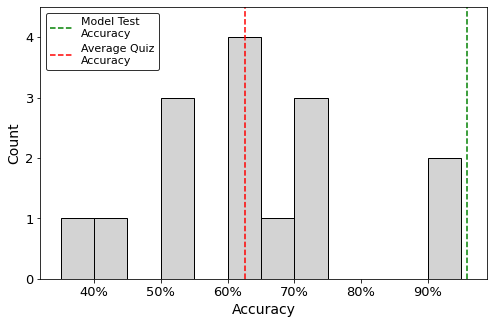

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
plt.hist(quiz_results['score']*100, bins = np.arange(0.35, 1, 0.05)*100, edgecolor = 'black', color = 'lightgray')
plt.vlines(model_results['val_binary_accuracy'].loc[25]*100, 
           ymin = 0, 
           ymax = 5, 
           linestyle = 'dashed',
           color = 'green',
           label = "Model Test\nAccuracy")
plt.vlines(quiz_avg*100, 
           ymin = 0, 
           ymax = 5, 
           linestyle = 'dashed',
           color = 'red', 
           label = "Average Quiz\nAccuracy")
plt.ylim(0, 4.5)
plt.yticks(np.arange(0, 5, 1),
           fontsize = 13)
plt.xticks(fontsize = 13)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
plt.legend(loc = "upper left",
           fontsize = 11,
           facecolor = 'white',
           edgecolor = 'black',)
plt.xlabel("Accuracy",
           fontsize = 14)
plt.ylabel("Count",
           fontsize = 14)
plt.savefig("QuizResultsPlot.png", dpi = 400, bbox_inches = 'tight')

In [7]:
model_acc

0.9570000171661376

In [8]:
quiz_avg

0.626667

In [9]:
np.std(quiz_results['score'])

0.1506528479406878

In [10]:
[quiz_avg - 2*np.std(quiz_results['score']), quiz_avg + 2*np.std(quiz_results['score'])]

[0.32536130411862435, 0.9279726958813757]